# Identificando y modelando relaciones entre pares de variables

![correlation](https://static.thenounproject.com/png/1569699-200.png)

> En la sesión anterior introdujimos el lenguaje de programación Python, y la librería de análisis de datos para Python **Pandas**. Con Pandas, aprendimos a:
  - Cargar datos desde archivos.
  - Manipular los datos de manera básica:
    - Obtener ciertos registros.
    - Obtener ciertas columnas.
    - Obtener registros basados en condiciones.
  - Calcular estadísticas agregadas de cada variable (media, mediana, desviación estándar).
  
> Con las estadísticas de cada variable, podemos darnos una idea del comportamiento de cada variable en particular; sin embargo, no podemos inferir relaciones de una variable con otra. En esta sesión, revisaremos métodos prácticos para identificar relaciones entre variables, y además estudiaremos un método para modelar dichas relaciones de manera lineal.
___

# 1. Coeficiente de correlación

El coeficiente de correlación mide qué tan fuerte es la relación entre dos variables. Dejaremos de lado la forma de calcularlo y nos concentraremos más en sus propiedades y la interpretación que podemos darle:

- La correlación entre dos variables cualesquiera $x,y$ satisface: $$-1\leq\rho_{xy}\leq 1.$$
- La correlación de una variable con ella misma es igual a uno (1): $$\rho_{xx}=1.$$
- La correlación es simétrica: $$\rho_{xy} = \rho_{yx}.$$

In [1]:
# Importar numpy
import numpy as np

In [2]:
# Importar pyplot
import matplotlib.pyplot as plt

- Una correlación positiva $\rho_{xy}>0$ indica que los movimientos relativos entre las variables $x,y$ van en la misma dirección.

Text(0, 0.5, 'y')

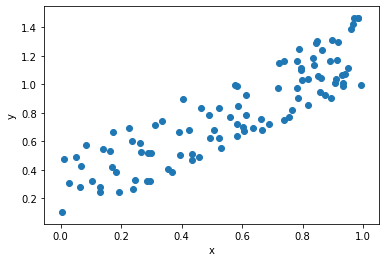

In [3]:
# Variables con correlación positiva
x = np.random.rand(100)
y = x + 0.5 * np.random.rand(100)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

In [4]:
# Correlación
np.corrcoef(x, y)

array([[1.        , 0.88062744],
       [0.88062744, 1.        ]])

- Una correlación negativa $\rho_{xy}<0$ indica que los movimientos relativos entre las variables $x,y$ van en direcciones opuestas.

Text(0, 0.5, 'y')

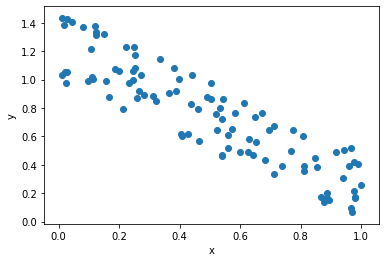

In [5]:
# Variables con correlación negativa
x = np.random.rand(100)
y = 1 - x + 0.5 * np.random.rand(100)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

In [6]:
# Correlación
np.corrcoef(x, y)

array([[ 1.        , -0.90294667],
       [-0.90294667,  1.        ]])

- Una correlación nula $\rho_{xy}=0$ indica que no hay una relación aparente entre las variables $x, y$.

Text(0, 0.5, 'y')

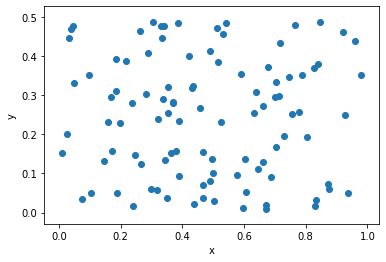

In [7]:
# Variables con correlación nula
x = np.random.rand(100)
y = 0.5 * np.random.rand(100)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

In [8]:
# Correlación
np.corrcoef(x, y)

array([[ 1.        , -0.03202238],
       [-0.03202238,  1.        ]])

Ya que entendimos el coeficiente de correlación, utilicémoslo para descubrir la relación que hay entre el precio de las casas y su tamaño:

In [11]:
# Importar pandas
import pandas as pd

In [13]:
# Cargamos datos de las casas
data = pd.read_csv("house_pricing.csv")

Text(0, 0.5, 'Precio (USD)')

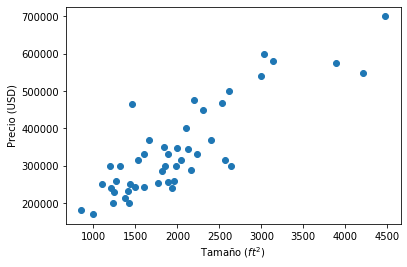

In [16]:
# Gráfico precio vs. tamaño
plt.scatter(data['size'], data['price'])
plt.xlabel('Tamaño ($ft^2$)')
plt.ylabel('Precio (USD)')

In [17]:
# Correlación
np.corrcoef(data['size'], data['price'])

array([[1.        , 0.85498759],
       [0.85498759, 1.        ]])

# 2. Regresión lineal con una variable

Una vez hemos identificado la relación entre dos variables, ¿Cómo podemos modelar esta relación?

La respuesta es: **regresión lineal**.

En términos simples, el objetivo de la regresión lineal es encontrar un modelo de una recta:

$$
y = m x + b
$$

que **"mejor" (en el sentido de mínimos cuadrados) se ajuste a los puntos**. En otras palabras, el objetivo es encontrar el modelo de una recta que "aprenda" los datos.

Matemáticamente, si los puntos son

$$
\{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\},
$$

lo que queremos es estimar los valores de los parámetros $m$ y $b$ que minimizan la siguiente función:

$$
J(m, b) = \sum_{i=1}^{n}(y_i - (m x_i + b))^2
$$

### ¿Cómo hacemos esto en python?

Mediante la clase `LinearRegression` de la librería `sklearn`:

In [18]:
# Importar sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression

In [19]:
# Ajustar la mejor recta a los datos de tamaños y precios
model = LinearRegression().fit(data[['size']], data['price'])

In [22]:
# Obtener parámetros ajustados
m = model.coef_
b = model.intercept_
m, b

(array([134.52528772]), 71270.49244872917)

Text(0, 0.5, 'Precio (USD)')

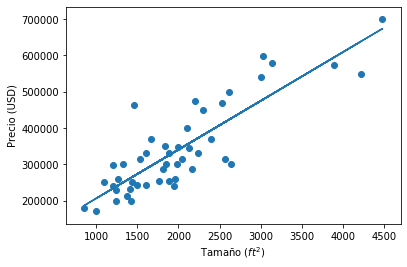

In [23]:
# Gráfico de datos y de modelo ajustado
plt.plot(data['size'], model.predict(data[['size']]))
plt.scatter(data['size'], data['price'])
plt.xlabel('Tamaño ($ft^2$)')
plt.ylabel('Precio (USD)')

### ¿Y esto para qué nos sirve? Sistema automático de avalúos

Supongamos que un amigo nuestro tiene una casa de $2000$ pies cuadrados en Portland, y desea saber a qué precio la podría vender. Se acaba de enterar que justo acabamos de generar un sistema automático que determina el precio de las casas de Portland usando el tamaño de las mismas.

¿A qué precio podría vender nuestro amigo la casa?

In [24]:
# Determinar el precio
model.predict([[2000]])

array([340321.06788921])

Text(0, 0.5, 'Precio (USD)')

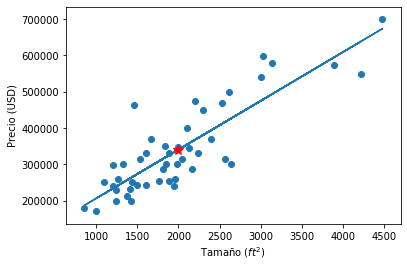

In [26]:
# Gráfico
plt.plot(data['size'], model.predict(data[['size']]))
plt.plot(2000, model.predict([[2000]]), '*r', ms=10)
plt.scatter(data['size'], data['price'])
plt.xlabel('Tamaño ($ft^2$)')
plt.ylabel('Precio (USD)')